# Adult dataset machine learning
Dataset availble from: https://archive.ics.uci.edu/ml/datasets/adult It contains data gathered from an American Census database and you can read more about it from the description available. 

In [1]:
# Importing necessary libaries, if you cant import them try to pip install them first. 
try: 
    import pandas as pd
except:
    print('installing pandas')
    !pip install pandas==0.25.1
    import pandas as pd

try:
    import numpy as np
except:
    print('installing numpy')
    !pip install numpy==1.19.5
    import numpy as np
try:
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
except:
    print('Installing matplot')
    !pip install matplot==3.1.1
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
try:
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
    from sklearn.neural_network import MLPClassifier
except:
    print('installing scikit-learn')
    !pip install scikit-learn==0.24.2 
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
    from sklearn.neural_network import MLPClassifier

try:
    from scipy.stats import randint
except:
    print('Installing scipy')
    !pip install scipy==1.3.1
    from scipy.stats import randint


In [2]:
#importing the dataset and assigning the features the right names
col_name = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation',
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
           'salary']
data = pd.read_csv('Adult/adult.data', header=None)
data.columns = col_name

In [3]:
#Function for plotting the different categories
#See MIT's site: https://ocw.mit.edu/resources/res-ec-001-exploring-fairness-in-machine-learning-for-international-development-spring-2020/module-four-case-studies/case-study-mitigating-gender-bias/
#If intrested in how it works
def plot_categs(df, category, fignum=1, title="Histogram of number of datapoints"):
    plt.figure(fignum)
    uniques= list(sorted(df[category].unique()))
    counts = [df[df[category] == value].shape[0] for value in uniques]
    size = len(uniques)
    xcoords = list(range(1, size+1))
    plt.bar(xcoords, counts)
    plt.xticks(xcoords, uniques, rotation='vertical' if size >= 5 else 'horizontal')
    plt.title((title if title is not None else ''))
    plt.tight_layout()

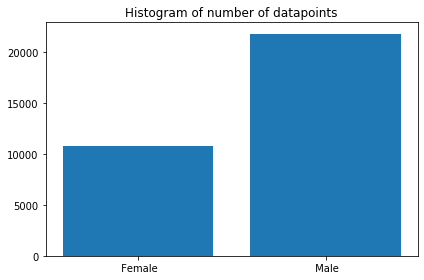

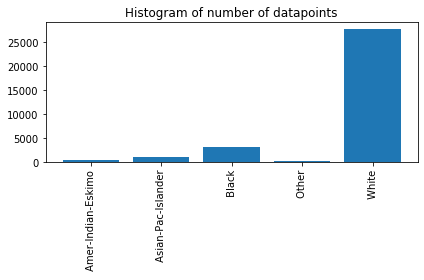

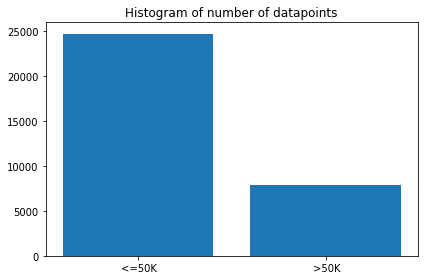

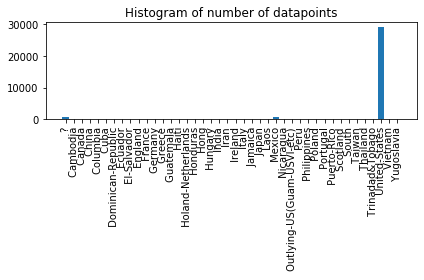

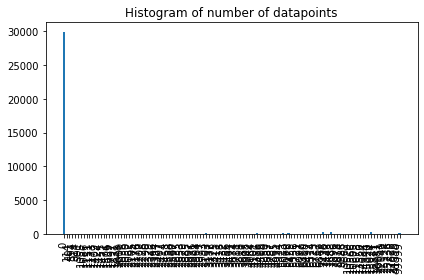

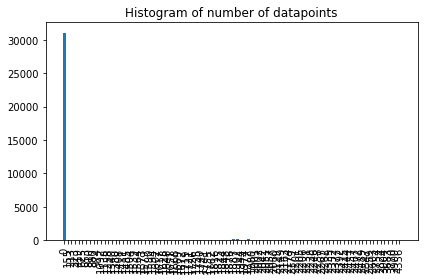

In [4]:
#Calling the function above, on sex, race and salary which is two sensetive features 
#And the class we want to classify. We also call it on native country to see how the spread of nationalities is
#And as we see 99% are native to the US
#We also plot capital_gain and capital loss as I have cheated a little and know that the distribution here is 
#interesting as almost everyone has 0 except for a few :)
features = ['sex', 'race', 'salary', 'native_country', 'capital_gain', 'capital_loss']
for index, feature in enumerate(features):
    plot_categs(data, feature, fignum=index+1)

In [5]:
#Again MIT function for plotting the different subgroups in a feature, ex:
#how many of those that make above 50k is male
#This is very practical in order to see if their is some obvious data correlation 
#between two features.
def subplot_categs(dfs, titles, category, fignum=1):
    plt.figure(fignum, figsize=(12, 6))
    number_of_dfs = len(titles)
    first_axis = None
    for df_index, df in enumerate(dfs):
        title = titles[df_index]
        uniques = list(sorted(df[category].unique()))
        counts = [df[df[category]==value].shape[0] for value in uniques]
        size = len(uniques)
        xcoords = list(range(1, size+1))
        if df_index == 0:
            first_axis =plt.subplot(1, 2, df_index+1)
        else:
            new_axis = plt.subplot(1, 2, df_index + 1, sharey=first_axis)
        plt.bar(xcoords, counts)
        plt.xticks(xcoords, uniques, rotation='vertical' if size >= 5 else 'horizontal')
        plt.title((title if title else ''))
        plt.tight_layout()

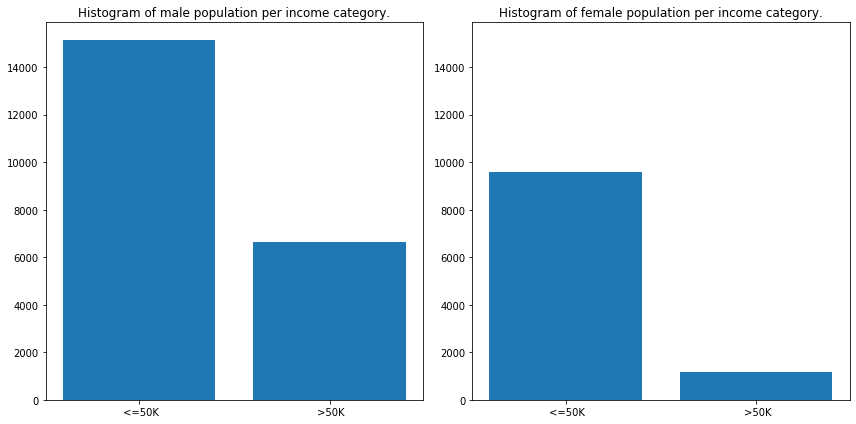

In [6]:

# Examining income category distribution among the male and female demographics
male_data = data[data.sex == ' Male']
female_data = data[data.sex == ' Female']
titles = ['Histogram of male population per income category.', 'Histogram of female population per income category.']
subplot_categs([male_data, female_data], titles, 'salary')

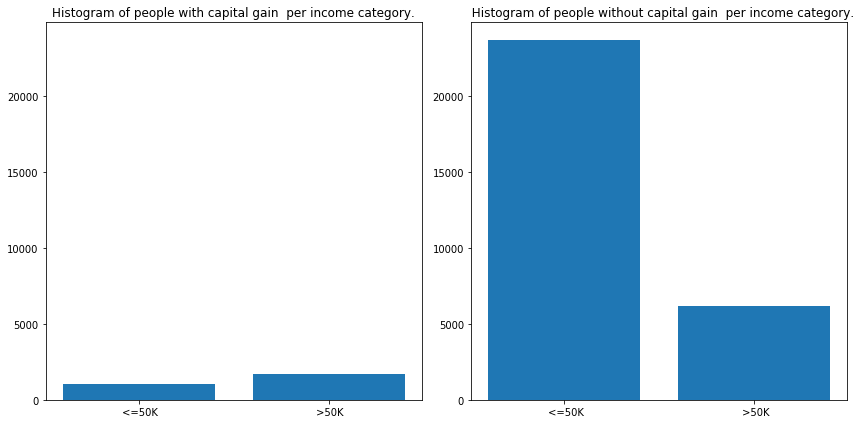

In [7]:
# Examining income category distribution among the male and female demographics
#As we see, for those with just a little capital gain there is a majority of those making over 50K 
# This group is a small outlier group which may have a big effect on the algorithm
cg_data = data[data.capital_gain > 100]
cgnot_data = data[data.capital_gain <= 0]
titles = ['Histogram of people with capital gain  per income category.', '  Histogram of people without capital gain  per income category.']
subplot_categs([cg_data, cgnot_data], titles, 'salary')

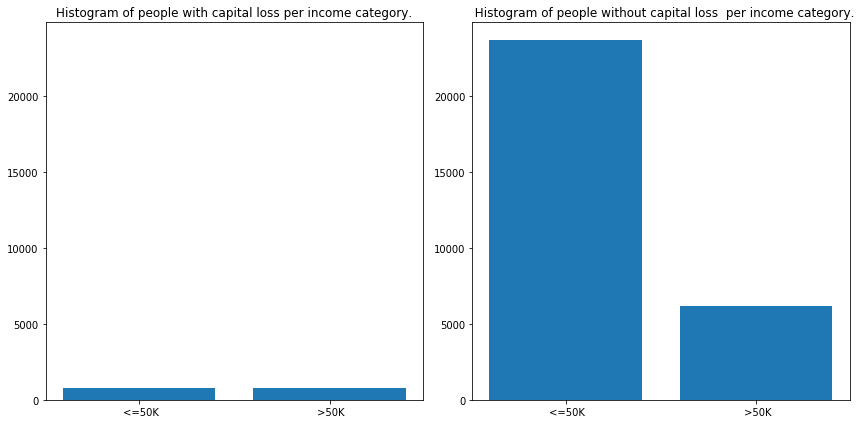

In [8]:
# Examining how it is fpr those with a capital loss
cl_data = data[data.capital_loss > 0]
clnot_data = data[data.capital_gain <= 0]
titles = ['Histogram of people with capital loss per income category.', '  Histogram of people without capital loss  per income category.']
subplot_categs([cl_data, clnot_data], titles, 'salary')

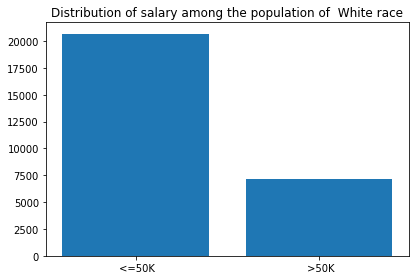

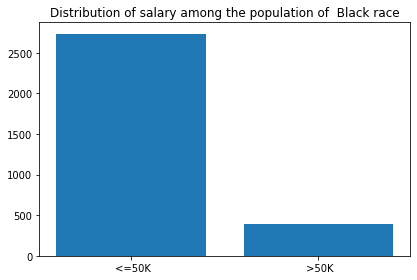

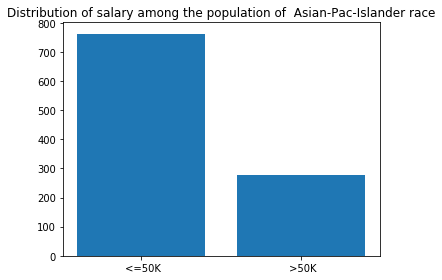

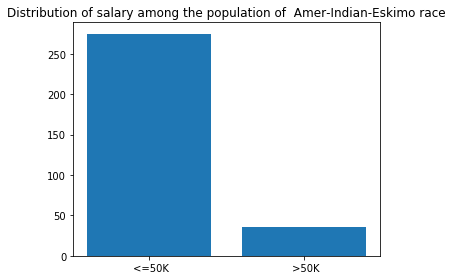

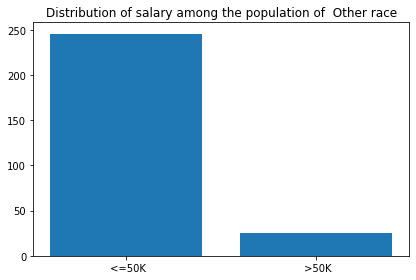

In [9]:
#Now we plot the distribution between the different races, to see if there is some
#correlations we do not want and that the data is normaly distributed among the races
unique_races = data['race'].unique()
for index, race in enumerate(unique_races):
    plot_categs(data[data['race'] == race], 'salary', fignum=index, title = "Distribution of salary among the population of "+race+" race")

Now we start the data cleaning. We first check for any missing or null values

In [10]:
#We dont see any null values
print('null?: ' , data.isnull().sum())

null?:  age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64


In [11]:
# Remove all missing values
for feature in data.columns:
    data[feature] = data[feature].replace(' ?', np.nan)
data.dropna(how='any', inplace=True)

In [12]:
#printing the different categorical features
data['native_country'].unique(), data['workclass'].unique(), data['occupation'].unique()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary', ' Holand-Netherlands'], dtype=object),
 array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repai

In [13]:
#Due to this data being gathered in the US, more than 90%+ is has its native country
#as US, therefor instead of onehot encode the 39 other countries,
#we will differentiate them by either native country is the US or it isn't
data.loc[data['native_country']!=' United-States', 'native_country'] = 'Non_US'
data.loc[data['native_country'] == ' United-States', 'native_country'] = 'US'
US_LABEL, NON_US_LABEL = (0, 1)
data['native_country'] = data['native_country'].map({'US':US_LABEL,'Non_US':NON_US_LABEL}).astype(int)
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,1,<=50K


In [14]:
#One hot encodes salary and gender, female 0, male 1, salary low:0, high:1
FEMALE_LABEL, MALE_LABEL = (0, 1)
LOW_SALARY_LABEL, HIGH_SALARY_LABEL = (0,1)
data['salary'] = data['salary'].replace([' <=50K'], LOW_SALARY_LABEL)
data['salary'] = data['salary'].replace([' >50K'], HIGH_SALARY_LABEL)
data['sex'] = data['sex'].replace([' Female'], FEMALE_LABEL)
data['sex'] = data['sex'].replace([' Male'], MALE_LABEL)
data.head()


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,1,0


In [15]:
#We may want to keep the feature space at semi low dimension so instead of directly 
#one hot encode martial_status we first make it into a binary saying you are either a 
#couple or you are singel
data['marital_status'] = data['marital_status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
data['marital_status'] = data['marital_status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')
COUPLE_STATUS_LABEL, SINGLE_STATUS_LABEL = (1, 0)
data['marital_status'] = data['marital_status'].map({'Couple':COUPLE_STATUS_LABEL,'Single':SINGLE_STATUS_LABEL})
data.head()


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,1,2174,0,40,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,1,0,0,13,0,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,1,0,0,40,0,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,1,0,0,40,0,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,0,0,0,40,1,0


In [16]:
#one-hot encode relationship 
dataRe = pd.get_dummies(data.relationship)
data = pd.concat([data, dataRe], axis=1)


data.head()


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,salary,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,1,...,0,40,0,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,1,...,0,13,0,0,1,0,0,0,0,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,1,...,0,40,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,1,...,0,40,0,0,1,0,0,0,0,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,0,...,0,40,1,0,0,0,0,0,0,1


In [17]:
#One-hot encode the race feature

dataRac = pd.get_dummies(data.race)
data = pd.concat([data, dataRac], axis=1)
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,1,...,1,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,1,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,1,...,1,0,0,0,0,0,0,0,0,1
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,1,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,0,...,0,0,0,0,1,0,0,1,0,0


In [18]:
#Dropping the original features we splited
#Should in the feature consider turning education into a numeric feature that
#better represent what it is?
data.drop('race', inplace=True, axis=1)
data.drop('relationship', inplace=True, axis=1)
data = data.drop(['education'], axis=1)
data.head()

,age,workclass,final_weight,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39,State-gov,77516,13,0,Adm-clerical,1,2174,0,40,...,1,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,13,1,Exec-managerial,1,0,0,13,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,215646,9,0,Handlers-cleaners,1,0,0,40,...,1,0,0,0,0,0,0,0,0,1
3,53,Private,234721,7,1,Handlers-cleaners,1,0,0,40,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,13,1,Prof-specialty,0,0,0,40,...,0,0,0,0,1,0,0,1,0,0


In [19]:
#Instead of having 6 different categories of employment it is better with 4
def group_workclass(x):
    if x['workclass'] == ' Federal-gov':return 'govt'
    elif x['workclass']== ' Local-gov':return 'govt'
    elif x['workclass']==' State-gov':return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc': return 'self_employed'
    elif x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'


data['workclass']= data.apply(group_workclass, axis=1)


data['workclass'] = data['workclass'].map({'govt':0,'private':1,'self_employed':2,'without_pay':3})
dataWo = pd.get_dummies(data.workclass)
data = pd.concat([data, dataWo], axis=1)
data.tail()


,age,workclass,final_weight,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,...,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,0,1,2,3
32556,27,1,257302,12,1,Tech-support,0,0,0,38,...,1,0,0,0,0,1,0,1,0,0
32557,40,1,154374,9,1,Machine-op-inspct,1,0,0,40,...,0,0,0,0,0,1,0,1,0,0
32558,58,1,151910,9,0,Adm-clerical,0,0,0,40,...,0,0,0,0,0,1,0,1,0,0
32559,22,1,201490,9,0,Adm-clerical,1,0,0,20,...,0,0,0,0,0,1,0,1,0,0
32560,52,2,287927,9,1,Exec-managerial,0,15024,0,40,...,1,0,0,0,0,1,0,0,1,0


In [20]:
#One-hot encoding of their occupation
dataoc = pd.get_dummies(data.occupation)
data = pd.concat([data, dataoc], axis=1)
data = data.drop(['occupation'], axis=1)
data.head()


,age,workclass,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,0,77516,13,0,1,2174,0,40,0,...,0,0,0,0,0,0,0,0,0,0
1,50,2,83311,13,1,1,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
2,38,1,215646,9,0,1,0,0,40,0,...,0,1,0,0,0,0,0,0,0,0
3,53,1,234721,7,1,1,0,0,40,0,...,0,1,0,0,0,0,0,0,0,0
4,28,1,338409,13,1,0,0,0,40,1,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# Normalize continuous numerical features
continuous_features = ['age', 'final_weight', 'education_num', 'hours_per_week']
X = data[continuous_features]
data[continuous_features] = (X - np.mean(X))/ np.std(X)
data.head()

,age,workclass,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0.042796,0,-1.062722,1.128918,0,1,2174,0,-0.077734,0,...,0,0,0,0,0,0,0,0,0,0
1,0.880288,2,-1.007871,1.128918,1,1,0,0,-2.331531,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.033340,1,0.244693,-0.439738,0,1,0,0,-0.077734,0,...,0,1,0,0,0,0,0,0,0,0
3,1.108695,1,0.425240,-1.224066,1,1,0,0,-0.077734,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.794697,1,1.406658,1.128918,1,0,0,0,-0.077734,1,...,0,0,0,0,0,1,0,0,0,0


In [22]:
#From the plots its clear most people either has 0 loss/win or have
#not much different on how much they lost/won
#So in ordder not having values of thousands affect our classification we 
#one hot encodes the features into you either have capital gained/lost or you haven't
#We should also take not that we know that in comparison to the rest of the data set, those with capital gain
#is a minority which is part of the elite few at the top
data.loc[(data['capital_loss'] > 0),'capital_loss'] = 1
data.loc[(data['capital_loss'] == 0 ,'capital_loss')]= 0
data.loc[(data['capital_gain'] > 0),'capital_gain'] = 1
data.loc[(data['capital_gain'] == 0 ,'capital_gain')]= 0
data.head()

,age,workclass,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0.042796,0,-1.062722,1.128918,0,1,1,0,-0.077734,0,...,0,0,0,0,0,0,0,0,0,0
1,0.880288,2,-1.007871,1.128918,1,1,0,0,-2.331531,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.033340,1,0.244693,-0.439738,0,1,0,0,-0.077734,0,...,0,1,0,0,0,0,0,0,0,0
3,1.108695,1,0.425240,-1.224066,1,1,0,0,-0.077734,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.794697,1,1.406658,1.128918,1,0,0,0,-0.077734,1,...,0,0,0,0,0,1,0,0,0,0


In [23]:
#shuffles then splits up into training and test set.
def get_dataset_split(dataset):
    data_shuffled = dataset.sample(frac=1).reset_index(drop=True)
    X = data_shuffled.drop(['salary'], axis=1)
    y = data_shuffled['salary']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.45)
    return (x_train, y_train), (x_test, y_test)

Now that the data is cleaned and shuffle we can start applying some machine learning

In [24]:
#training MLP algorithm on the data with 1000 iterations
MLP_MAX_ITER=10000
(x_train, y_train), (x_test, y_test) = get_dataset_split(data)
model = MLPClassifier(max_iter=MLP_MAX_ITER)
model.fit(x_train,y_train)
prediction = model.predict(x_test)


In [25]:
#For testing and accessing the accuracy
#we can extract the dataframe of what the algorithm guessed and what's accurate
#this makes it easier for us later as we can query a dataframe
test_df = x_test.copy()
test_df['salary'] = y_test
test_df['pred'] = pd.Series(prediction, index=test_df.index)
test_df['accurate'] = (test_df['pred'] == test_df['salary'])
test_df.head()

,age,workclass,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,...,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,salary,pred,accurate
27585,-0.490154,2,1.522275,-0.831902,1,1,0,0,-0.077734,0,...,0,0,0,0,0,0,0,0,0,True
30062,0.575745,0,-0.622074,1.521083,0,0,0,0,2.009115,0,...,0,0,0,0,0,0,0,1,1,True
27235,-1.403782,1,1.105952,-0.047574,0,1,0,0,-1.747213,0,...,0,0,0,0,0,0,0,0,0,True
10238,-0.642425,0,1.571162,-0.439738,0,0,0,0,0.757005,0,...,0,0,0,0,0,0,0,0,0,True
15374,0.195067,1,1.389943,-0.047574,0,0,0,0,3.261224,0,...,0,0,0,0,0,0,0,0,0,True


In [26]:
print("Accuracy: ", test_df.accurate.mean())


Accuracy:  0.8259043689678037


In [27]:
#Method to see how the algorithm did with regards to gender
#Again from the MIT, this might be useful or might not, you decide
def evaluate_gender_performance(results_df, print_stats=True):
    
    def printline():
        _print('-------------------------------------------------')
        
    def _print(*args, **kwargs):
        if print_stats:
            print (args, kwargs)
    
    summaries = {}
    overall_accuracy = results_df.accurate.mean()
    summaries['accuracy_overall'] = overall_accuracy
    printline()
    _print("\n1.Overall accuracy: ", overall_accuracy)
    
    printline()
    
    # Accuracy accross gender
    _print("\n2.Accuracy accross gender \n ")
    printline
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex==gender[0]]
        accuracy_for_gender = rows.accurate.mean();
        summaries['accuracy_'+gender[1]] = accuracy_for_gender
        _print("P(((high, HIGH) or (low, LOW)) |", gender[1], "): ", accuracy_for_gender)
    printline()
    
    _print("\n3.Positive Rates: \n")
    # High income rate given gender
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex==gender[0]]
        positive_rate_for_gender = (rows['pred'] ==HIGH_SALARY_LABEL).mean()
        summaries['positive_rate_'+gender[1]] = positive_rate_for_gender
        _print("P(high|", gender[1], "): ", positive_rate_for_gender)
    printline()
    
    _print("\n4. Negative Rates: \n")
    
    # Low income rate given gender
    # High income rate given gender
    for gender in [(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]:
        rows = results_df[results_df.sex==gender[0]]
        positive_rate_for_gender = (rows['pred'] ==LOW_SALARY_LABEL).mean()
        summaries['negative_rate_'+gender[1]] = positive_rate_for_gender
        _print("P(low|", gender[1], "): ", positive_rate_for_gender)
    printline()
    
    _print("\n4. True positive and True negative rates")
    
    printline()
    
    for index, gender in enumerate([(FEMALE_LABEL, "Female"), (MALE_LABEL, "Male")]):
        
        _print("\n4."+("i")*(1+index), " True positive and negative rates on sex="+gender[1], "\n")
        rows = results_df[results_df.sex==gender[0]]
        
        high_income = rows[rows.salary== HIGH_SALARY_LABEL]
        low_income=rows[rows.salary == LOW_SALARY_LABEL]
        if high_income.shape[0] > 0:
            assert high_income.salary.mean() == HIGH_SALARY_LABEL, "high_mean: " + str(high_income.salary.mean())
        if low_income.shape[0] > 0:
            assert low_income.salary.mean() == LOW_SALARY_LABEL, "low_mean: " + str(low_income.salary.mean())
        
        high_pred = rows[rows.pred == HIGH_SALARY_LABEL]
        low_pred = rows[rows.pred == LOW_SALARY_LABEL]
        if high_pred.shape[0] > 0:
            assert high_pred.pred.mean() == HIGH_SALARY_LABEL, "high_pred_mean: " + str(high_pred.pred.mean())
        if low_pred.shape[0] > 0:
            assert low_pred.pred.mean() == LOW_SALARY_LABEL, "low_pred_mean: " + str(low_pred.pred.mean())
        
        printline() 
        true_positive_rate = high_income.accurate.mean()
        true_negative_rate = low_income.accurate.mean()
        summaries['true_positive_rate_'+gender[1]] = true_positive_rate
        summaries['true_negative_rate_'+gender[1]] = true_negative_rate
        
        _print(str.format("P((high, HIGH)| HIGH,{0})", gender[1]), ": ",true_positive_rate)
        _print(str.format("P((low, LOW)| LOW,{0})", gender[1]), ":",true_negative_rate)
        
        printline()
        true_positive_rate_on_positive_predictions = high_pred.accurate.mean()
        true_negative_rate_on_negative_predictions = low_pred.accurate.mean()
        summaries['true_positive_rate_on_positive_predictions_'+gender[1]] = true_positive_rate_on_positive_predictions
        summaries['true_negative_rate_on_negative_predictions_'+gender[1]] = true_negative_rate_on_negative_predictions
        _print(str.format("P((high,HIGH) | high, {0})", gender[1]), ": ",true_positive_rate_on_positive_predictions)
        _print(str.format("P((low,LOW) |low,{0})", gender[1]), ":", true_negative_rate_on_negative_predictions)
        
        
    return summaries

def plot_performance_per_group(accuracy_results, title, fignum=1, rotation='horizontal', 
                               labels=["Male", "Female"]):
    
    """
    Plot results for 2 groups stacked together
    """
    assert isinstance(accuracy_results, list), "Accuracy results must be a list"
    
    
    indices = [0]
    colors = ['red', 'blue']
    fig, ax = plt.subplots()
    
    for index in indices:
        ax.scatter(index, accuracy_results[0][index], c=colors[0], label=labels[0] if labels and index ==0 else None)
        ax.scatter(index, accuracy_results[1][index], c=colors[1], label=labels[1] if labels and index ==0 else None)
        
    if labels:
        ax.legend()
        
    #plt.xticks(indices, approaches, rotation=rotation)
    plt.title(title)
    
    plt.show()
    
    
def plot_comparisons_groups(approaches, accuracy_results, title, fignum=1, rotation='horizontal', labels=["Male", "Female"]):    
    """
    Plot results for 2 groups stacked together
    """
    assert isinstance(accuracy_results, list), "Accuracy results must be a list"
    
    
    indices = list(range(len(approaches)))
    colors = ['red', 'blue']
    fig, ax = plt.subplots()
    
    for index in indices:
        ax.scatter(index, accuracy_results[0][index], c=colors[0], label=labels[0] if labels and index ==0 else None)
        ax.scatter(index, accuracy_results[1][index], c=colors[1], label=labels[1] if labels and index ==0 else None)
        
    if labels:
        ax.legend()
        
    plt.xticks(indices, approaches, rotation=rotation)
    plt.title(title)
    
    plt.show()
    
def plot_model_gender_metrics(_feature, _summaries, _modelNames, _title, rotation='vertical'):
    gender_metrics = [[summary[_feature+'_Male'] for summary in _summaries], 
                         [summary[_feature+'_Female'] for summary in _summaries]
                        ]
    plot_comparisons_groups(_modelNames,gender_metrics, _title, rotation=rotation)

def model_summary(model_name, title, summary):
    summaries = []
    model_names = []
    
    for key in ["accuracy", "positive_rate", "negative_rate", "true_positive_rate", "true_negative_rate"]:
        new_summary = {"accuracy_Male": summary[key+"_Male"], "accuracy_Female": summary[key+"_Female"]}
        summaries.append(new_summary)
        model_names.append(key)   
    plot_model_gender_metrics("accuracy", summaries, model_names, model_name)
    #plot_model_gender_metrics(key, [summary], [model_name], "Model="+model_name+", Metric="+key, rotation="horizontal")

('-------------------------------------------------',) {}
('\n1.Overall accuracy: ', 0.8259043689678037) {}
('-------------------------------------------------',) {}
('\n2.Accuracy accross gender \n ',) {}
('P(((high, HIGH) or (low, LOW)) |', 'Female', '): ', 0.9097914777878513) {}
('P(((high, HIGH) or (low, LOW)) |', 'Male', '): ', 0.7855037659644144) {}
('-------------------------------------------------',) {}
('\n3.Positive Rates: \n',) {}
('P(high|', 'Female', '): ', 0.09179510426110607) {}
('P(high|', 'Male', '): ', 0.25357493723392643) {}
('-------------------------------------------------',) {}
('\n4. Negative Rates: \n',) {}
('P(low|', 'Female', '): ', 0.908204895738894) {}
('P(low|', 'Male', '): ', 0.7464250627660736) {}
('-------------------------------------------------',) {}
('\n4. True positive and True negative rates',) {}
('-------------------------------------------------',) {}
('\n4.i', ' True positive and negative rates on sex=Female', '\n') {}
('---------------------

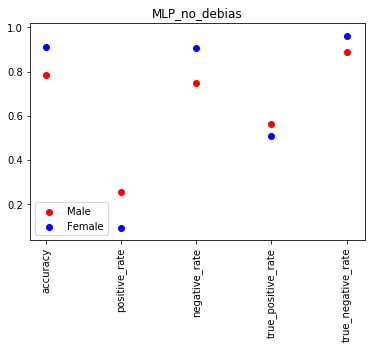

In [28]:
original_approach = evaluate_gender_performance(test_df)
model_summary("MLP_no_debias", "", original_approach)

In [29]:
#Calculating independence according to fairness book
#P{R=1 | A=a} = P{R=1 | A=b}
#P{Salary= >50K | gender=male} = P{Salary= >50K | gender=female} 
#P{Salary= <50K | gender=male} = P{Salary= <50K | gender=female}
#or at least within 80% of each other

#women correctly predicted make over 50K
tpF = test_df.query("sex==0 & salary==1 & accurate==True").shape[0]
print("True Positive(F): women correctly predicted make over 50K:",tpF)
#men correctly predicted make over 50K
tpM = test_df.query("sex==1 & salary==1 & accurate==True").shape[0]
print("True Positive(M): men correctly predicted make over 50K:", tpM)
#women wrongly guessed over 50k
fpF = test_df.query("sex==0 & salary==1 & accurate==False").shape[0]
print("False Positive(F): women predicted wrongly make over 50K:", fpF)
#men wrongly guessed make over 50k
fpM = test_df.query("sex==1 & salary==1 & accurate==False").shape[0]
print("False Positive(M): men predicted wrongly make over 50K:", fpM)

#women correctly guessed make less than 50k
tnF = test_df.query("sex==0 & salary==0 & accurate==True").shape[0]
print("True Negative(F): women correctly predicted make less than 50K:", tnF)
#men correctly guessed make less than 50K
tnM = test_df.query("sex==1 & salary==0 & accurate==True").shape[0]
print("True Negative(M): men correctly predicted make less than 50K:", tnM)
#Women wrongly guessed make less than 50K
fnF = test_df.query("sex==0 & salary==0 & accurate==False").shape[0]
print("False Negative(F): women wrongly predicted make less than 50K:",fnF)
#men wrongly guessed make less than 50K
fnM = test_df.query("sex==1 & salary==0 & accurate==False").shape[0]
print("False Negative(M): men wrongly predicted make less than 50K:",fnM)

#total woman making over 50K
pred_posF = test_df.query("sex==0 & salary==1").shape[0]
print("total predicted women over 50K", pred_posF)

#total men making over 50K
pred_posM = test_df.query("sex==1 & salary==1").shape[0]
print("total predicted men over 50K", pred_posM)

#Total women making under 50K
pred_negF = test_df.query("sex==0 & salary==0").shape[0]
print("total predicted women under 50K", pred_negF)

#Total men making under 50K
pred_negM = test_df.query("sex==1 & salary==0").shape[0]
print("total predicted men under 50K", pred_negM)

#Here I only use what it correctly predicted, but think I should use everything?
#independence above 50K
print("Women above 50K: ", pred_posF, "predicted make over 50K of", pred_posF+pred_negF, " = ", (pred_posF/(pred_posF+pred_negF)*100),'%')
print("Men above 50K:", pred_posM, '/', pred_posM+pred_negM, '= ', (pred_posM/(pred_posM+pred_negM))*100, "%")
#independence under 50K
print("Women under 50K:", pred_negF, '/', pred_negF+pred_posF, '= ', (pred_negF/(pred_posF+pred_negF))*100, "%")
print("Men under 50K:", pred_negM, '/', pred_posM+pred_negM, '= ', (pred_negM/(pred_posM+pred_negM))*100, "%")

True Positive(F): women correctly predicted make over 50K: 262
True Positive(M): men correctly predicted make over 50K: 1613
False Positive(F): women predicted wrongly make over 50K: 255
False Positive(M): men predicted wrongly make over 50K: 1255
True Negative(F): women correctly predicted make less than 50K: 3752
True Negative(M): men correctly predicted make less than 50K: 5583
False Negative(F): women wrongly predicted make less than 50K: 143
False Negative(M): men wrongly predicted make less than 50K: 710
total predicted women over 50K 517
total predicted men over 50K 2868
total predicted women under 50K 3895
total predicted men under 50K 6293
Women above 50K:  517 predicted make over 50K of 4412  =  11.71804170444243 %
Men above 50K: 2868 / 9161 =  31.306625914201508 %
Women under 50K: 3895 / 4412 =  88.28195829555757 %
Men under 50K: 6293 / 9161 =  68.6933740857985 %


There is here more than 20% difference in the indepence for each gender, you are more likely to be predicted to make over 50K if you are a man than if you are a woman. In short, the algorithm uses your gender in some regard to predict whether you earn more than 50K a year.

In [30]:
#Function to see how a crossvalidated randomforest performs
def cross_validate(X = x_train,y = y_train):

    models = []
    models.append(('RF',RandomForestClassifier()))

    

    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [31]:
cross_validate(x_train,y_train)

Model:RF,Mean: 0.8305297371527847,Std Dev: 0.007755200321142354


In [32]:
#Finding which set of parameters for randomforest gives the best results
param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),
        
    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(x_train,y_train)
rnd_search.best_params_

{'max_depth': 8, 'max_features': 8, 'n_estimators': 131}

In [33]:
#Using whats deemed to be the best set of parameters to train the model
rf_clf = RandomForestClassifier(random_state=42, max_depth=8, max_features=8, n_estimators=131)
rf_clf.fit(x_train, y_train)
predictions_train_rf = rf_clf.predict(x_test)

In [34]:
#Statistical overview of random forest
print('Accuracy RForest: {}'.format(accuracy_score(y_test,predictions_train_rf)))
print('Precision RForest: {}'.format(precision_score(y_test,predictions_train_rf)))
print('Recall RForest: {}'.format(recall_score(y_test,predictions_train_rf)))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_rf))

Accuracy RForest: 0.8368083695572092
Precision RForest: 0.7419354838709677
Recall RForest: 0.5299852289512555
RandomForest_Confusion Matrix
[[9564  624]
 [1591 1794]]
